In [31]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from SDOM_analysis import SDOM_analysis
from linear_regression import linear_regression
import matplotlib.pyplot as plt


def rpm_to_w(rpm):
    f = (rpm*2*math.pi)/60;
    return f
    
cue_ball_mass = 0.178; # kg
dM = 0.001; # kg

ball_r = 2.85e-2; # meters, radius of cue ball
dRball = 0.001; # meters, error in radius measurement

Current = np.array([1.998, 1.799, 1.599, 1.399, 1.198, 0.999]); # A
dI = 0.001

dT = 0.1; # s

N = 200 # no units
mu_0 = 4e-7*math.pi # H/m
D = 21e-2 # [m], diameter of helmholtz coils
dD = 1e-2 # [m], error in diameter measurement

I_s = (2/5) * cue_ball_mass * (ball_r ** 2)

d_r_squared = 2 * (dRball/ball_r) * (ball_r**2)

dI_s = math.sqrt((d_r_squared/(ball_r**2))**2 + (dM/cue_ball_mass)**2) * I_s

dw_s = 10 # RPM
dw_s = rpm_to_w(dw_s) # rad/s


print(f"moment of intertia = {I_s:.2e} +/- {dI_s:.2e} kg m^2")

moment of intertia = 5.78e-05 +/- 4.07e-06 kg m^2


In [32]:
df_osc = pd.read_csv("Data/lab4_osc(in).csv")

In [33]:
df_osc

,Trial,B-Direction,T_o(s),dT,I(Amps),dI
0,1,Up,1.5,0.1,1.999,0.005
1,2,Up,1.7,0.1,1.799,0.005
2,3,Up,1.8,0.1,1.599,0.005
3,4,Up,2.0,0.1,1.399,0.005
4,5,Up,2.3,0.1,1.199,0.005
5,6,Up,2.4,0.1,0.998,0.005


In [34]:
B = (16*N*mu_0*Current)/(math.sqrt(125)*D) # T

B_err = math.sqrt((dI_s/I_s)**2 + (dD/D)**2)*B

In [35]:
print(B)
print(B_err)

[0.00342201 0.00308118 0.00273863 0.00239609 0.00205183 0.001711  ]
[0.00029085 0.00026188 0.00023276 0.00020365 0.00017439 0.00014542]


In [36]:
T = np.array(df_osc['T_o(s)'])

In [37]:
T

array([1.5, 1.7, 1.8, 2. , 2.3, 2.4])

In [40]:
mu_osc = (4 * (math.pi**2) * I_s)/(T**2 *B)


mu_osc_err = []
for I, period, mu in zip(Current, T, mu_osc):
    mu_osc_err.append(math.sqrt((dM/cue_ball_mass)**2 + 4*(dRball/ball_r)**2 + (dD/D)**2 + (dI/I)**2 + 4*(dT/period)**2)*mu)

In [41]:
print(mu_osc)
print(mu_osc_err)

[0.29652814 0.25639816 0.25730631 0.23821341 0.21034463 0.23166261]
[np.float64(0.04688686138892205), np.float64(0.03721296407756154), np.float64(0.03599511812779751), np.float64(0.0312634008074245), np.float64(0.025577301834668716), np.float64(0.027575805318345116)]


mean = 2.484089e-01
SDOM = 1.196067e-02
STDEV = 2.929754e-02


(np.float64(0.24840887403060355), 0.029297537207731456, 0.011960669479857787)

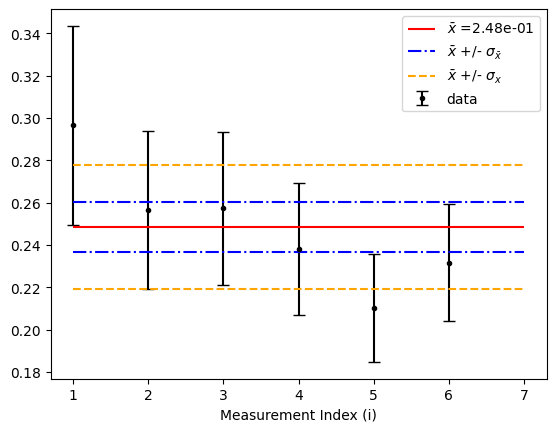

In [42]:
mean, std, sdom = SDOM_analysis(len(mu_osc), mu_osc, mu_osc_err)
plt.savefig('figures/SDOM_osc.png')

mean, std, sdom

In [43]:
df_prec = pd.read_csv("Data/lab4_prec(in).csv")

In [44]:
df_prec

,Trial,B-Direction,T_p(s),dT,w_s(RPM),dw_s,I(Amps),dI
0,1,Up,7.6,0.2,220,10,1.998,0.005
1,2,Up,7.5,0.2,210,10,1.799,0.005
2,3,Up,11.8,0.2,240,10,1.599,0.005
3,4,Up,12.4,0.2,235,10,1.399,0.005
4,5,Up,13.2,0.2,205,10,1.198,0.005
5,6,Up,18.9,0.2,216,10,0.999,0.005
6,1,Down,6.0,0.2,230,10,1.998,0.005
7,2,Down,5.5,0.2,180,10,1.799,0.005
8,3,Down,5.5,0.2,135,10,1.599,0.005
9,4,Down,5.0,0.2,130,10,1.399,0.005


In [45]:
df_up = df_prec.loc[df_prec['B-Direction'] == 'Up']
df_down = df_prec.loc[df_prec['B-Direction'] == 'Down']

In [46]:
df_up

,Trial,B-Direction,T_p(s),dT,w_s(RPM),dw_s,I(Amps),dI
0,1,Up,7.6,0.2,220,10,1.998,0.005
1,2,Up,7.5,0.2,210,10,1.799,0.005
2,3,Up,11.8,0.2,240,10,1.599,0.005
3,4,Up,12.4,0.2,235,10,1.399,0.005
4,5,Up,13.2,0.2,205,10,1.198,0.005
5,6,Up,18.9,0.2,216,10,0.999,0.005


In [47]:
T_prec = np.array(df_prec['T_p(s)'])
dT_prec = np.array(df_prec['dT'])

In [48]:
w_s = np.array(df_prec['w_s(RPM)'])
w_s = rpm_to_w(w_s)

In [49]:
w_s

array([23.03834613, 21.99114858, 25.13274123, 24.60914245, 21.4675498 ,
       22.61946711, 24.08554368, 18.84955592, 14.13716694, 13.61356817,
       17.27875959, 15.70796327])

In [50]:
w_p = np.array(df_prec['T_p(s)'])
w_p = (2*math.pi)/w_p

In [51]:
w_p

array([0.82673491, 0.83775804, 0.53247333, 0.50670849, 0.47599889,
       0.33244367, 1.04719755, 1.14239733, 1.14239733, 1.25663706,
       0.8975979 , 0.8490791 ])

In [52]:
B_prec = np.concatenate((B, B))
B_prec

array([0.00342201, 0.00308118, 0.00273863, 0.00239609, 0.00205183,
       0.001711  , 0.00342201, 0.00308118, 0.00273863, 0.00239609,
       0.00205183, 0.001711  ])

In [88]:
mu_prec = (I_s * w_s * w_p)/(B_prec)

Current2 = np.concatenate((Current, Current))

mu_prec_err = []
for I, mu, w, T, dT in zip(Current2, mu_prec, w_s, T_prec, dT_prec):
    mu_prec_err.append(math.sqrt((dM/cue_ball_mass)**2 + 4*(dRball/ball_r)**2 + (dD/D)**2 + (dI/I)**2 + (dw_s/w)**2 + (dT/T)**2)*mu)

print(mu_prec_err)

def pairing_vals(arr):
    
    up_arr = [n for i, n in enumerate(arr) if i < len(arr)/2]
    down_arr = [n for i, n in enumerate(arr) if i >= len(arr)/2]

    avgd_arr = [(up+down)/2 for up, down in zip(up_arr, down_arr)]

    return np.array(avgd_arr)

mu_prec_avgd = pairing_vals(mu_prec)
mu_prec_err_avgd = pairing_vals(mu_prec_err)

# print(mu_prec_avgd)
# print(mu_prec_err_avgd)
# print(type(mu_prec_err_avgd))

[np.float64(0.03216091633630244), np.float64(0.03492830731819959), np.float64(0.027176009320808905), np.float64(0.029016799977961017), np.float64(0.02856080643353381), np.float64(0.024747113988951713), np.float64(0.04310373855979166), np.float64(0.043592611611582906), np.float64(0.04040143066284421), np.float64(0.05013230023002948), np.float64(0.0473120198601583), np.float64(0.05019854697154126)]


In [54]:
print(mu_prec)
print(mu_prec_err)

[0.32188909 0.34579565 0.28260083 0.30096855 0.28801544 0.25416697
 0.4262592  0.40417673 0.34104782 0.41290324 0.4371412  0.45080291]
[np.float64(0.03216091633630244), np.float64(0.03492830731819959), np.float64(0.027176009320808905), np.float64(0.029016799977961017), np.float64(0.02856080643353381), np.float64(0.024747113988951713), np.float64(0.04310373855979166), np.float64(0.043592611611582906), np.float64(0.04040143066284421), np.float64(0.05013230023002948), np.float64(0.0473120198601583), np.float64(0.05019854697154126)]


mean = 3.554806e-01
SDOM = 9.475456e-03
STDEV = 2.321003e-02


Text(0, 0.5, '$\\mu$ [A m$^2$]')

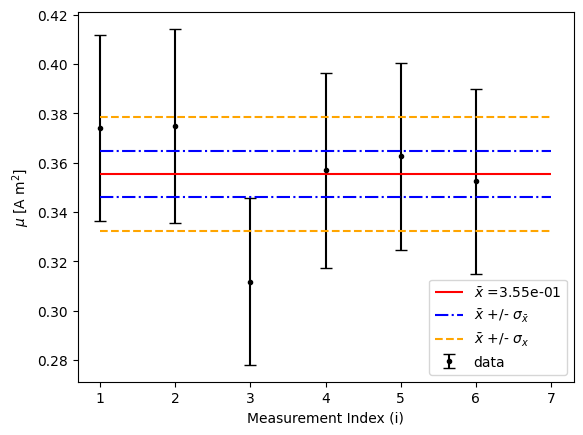

In [87]:
SDOM_analysis(len(mu_prec_avgd), mu_prec_avgd, mu_prec_err_avgd)
plt.ylabel(r'$\mu$' + r' [A m$^2$]')

mean = 3.197900e-01
SDOM = 1.817775e-02
STDEV = 7.712167e-02


(np.float64(0.31979004934057575), 0.07712166619321685, 0.018177751047209652)

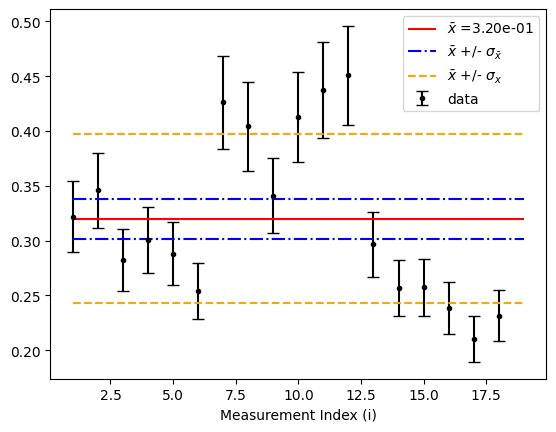

In [56]:
mu_tot = np.concatenate((mu_prec, mu_osc))
SDOM_analysis(len(mu_tot), mu_tot, mu_tot/10)
plt.ylabel(r'$\mu$' + r' [A m$^2$]')

In [1]:
SDOM_analysis(len(mu_prec), mu_prec, mu_prec_err)
plt.savefig('figures/SDOM_prec.png')
plt.ylabel(r'$\mu$' + r' [A m$^2$]')

NameError: name 'SDOM_analysis' is not defined

slope = 4.07e-01, with uncertainty 3.7e-02
intercept = -1.97e-04, with uncertainty 8.6e-05
mu = 0.40722561416305114 +/- 0.0372398813255478


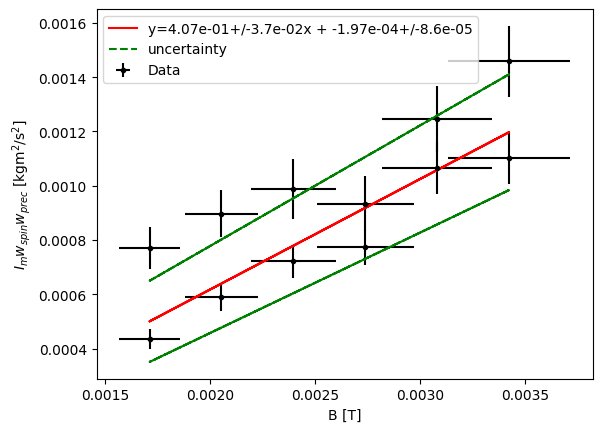

In [86]:
x_ax_prec = B_prec 
y_ax_prec = I_s * w_s * w_p
x_err = np.concatenate((B_err, B_err))

T_p = np.array(df_prec['T_p(s)'])
dT_p = 0.2

y_err = []
for w, T, y_ax in zip(w_s, T_p, y_ax_prec):
    y_err.append(math.sqrt((dI_s/I_s)**2 + (dw_s/w)**2 + (dT_p/T)**2)*y_ax)

slope, dslope, inter, dinter = linear_regression(x_ax_prec, y_ax_prec, x_err, y_err)

mu_prec_linear = slope
mu_err_prec_linear = dslope

print(f"mu = {mu_prec_linear} +/- {mu_err_prec_linear}")

plt.xlabel('B [T]')
plt.ylabel(r'$I_m w_{spin} w_{prec}$ [kgm$^2$/s$^2$]')
plt.savefig('figures/Linear_analysis_prec.png')

slope = 1.36e+02, with uncertainty 2.1e+01
intercept = -7.16e-02, with uncertainty 4.5e-02
mu = 0.31098306938483805 +/- 0.05242760779487348


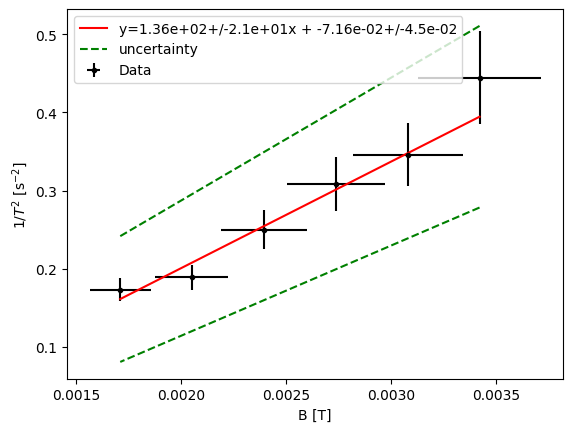

<Figure size 640x480 with 0 Axes>

In [85]:
T = np.array(df_osc['T_o(s)']) # s
dT = 0.1
Current = np.array([1.998, 1.799, 1.599, 1.399, 1.198, 0.999]); # A
B = (16*N*mu_0*Current)/(math.sqrt(125)*D) # T

y_ax_osc = 1/(T**2)
x_ax_osc = B
x_err = B_err
y_err = (2*dT/(T**3))

slope, dslope, inter, dinter = linear_regression(x_ax_osc, y_ax_osc, x_err, y_err)

mu = slope * 4*(math.pi**2) * I_s

mu_linear_err = math.sqrt((dslope/slope)**2 + (dI_s/I_s)**2)*mu

print(f"mu = {mu} +/- {mu_linear_err}")

plt.xlabel('B [T]')
plt.ylabel(r'$1/T^2$ [s$^{-2}$]')
plt.show()
plt.savefig("figures/second_linear_analysis.png")